# 数据集验证学习曲线

对于学习曲线的分析，包含两种，分别是:参数学习曲线和数据集学习曲线。参数学习曲线是指在给定的数据集下的学习曲线；数据集学习曲线是通过增加数据集的方式来查看学习曲线。对于一个模型的影响来说，要么是参数，要么是数据集的数量。所以这两种不同的曲线从不同的角度对模型进行了分析。

In [4]:
# coding:utf-8

import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve
%matplotlib inline

In [12]:
def plot_learning_curve(estimator, title, X, y, ylim=None,
                       cv=None, n_jobs=1,
                       train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel('Traning examples')
    plt.ylabel('Score')
    
    train_sizes, train_scores, test_scores = \
    learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                  train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [13]:
digits = load_digits()
X, y = digits.data, digits.target

生成100组随机训练集和测试集

<module 'matplotlib.pyplot' from '/Library/Python/2.7/site-packages/matplotlib/pyplot.pyc'>

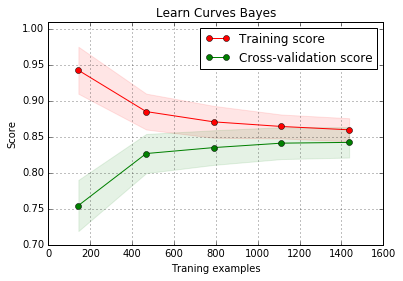

In [15]:
cv = cross_validation.ShuffleSplit(digits.data.shape[0],
                                  n_iter=100,
                                  test_size=0.2,
                                  random_state=0)
estimator = GaussianNB()

title = 'Learn Curves Bayes'
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01),
                   cv=cv, n_jobs=4)



从图形上分析来看，训练集在小于200的时候，是训练集拟合的较好，但是验证集拟合的非常差，而随着数据量的增加拟合的越来越好。这说明数据量对这个例子，有着非常重要的影响因素。